Data inserted into the student table
Data inserted into the grades table
Students and their grades:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 84)
('Bob', 'Smith', 'English', 80)
('Bob', 'Smith', 'History', 78)
('Carol', 'White', 'Math', 90)
('Carol', 'White', 'English', 92)
('Carol', 'White', 'History', 94)
('David', 'Brown', 'Math', 86)
('David', 'Brown', 'English', 82)
('David', 'Brown', 'History', 90)
('Eve', 'Davis', 'Math', 94)
('Eve', 'Davis', 'English', 94)
('Eve', 'Davis', 'History', 98)
Average grade per student:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 80.66666666666667)
('Carol', 'White', 92.0)
('David', 'Brown', 86.0)
('Eve', 'Davis', 95.33333333333333)
Highest average grade: Eve
Average math grade: 89.8
students with a grade above 90:
('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'English', 92)
('Carol', 'White', 'History', 94)
('Eve', 'Davis', 'Math', 94)
('Eve', 'Davis', 'Eng

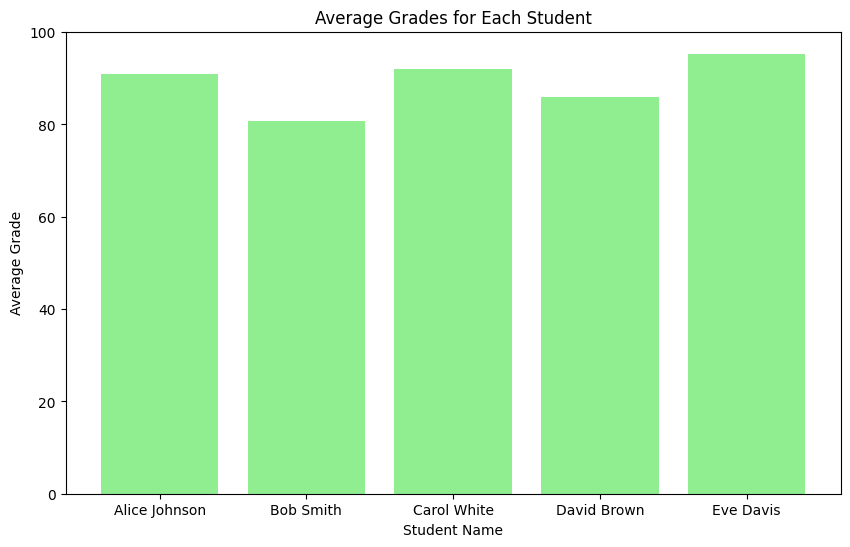

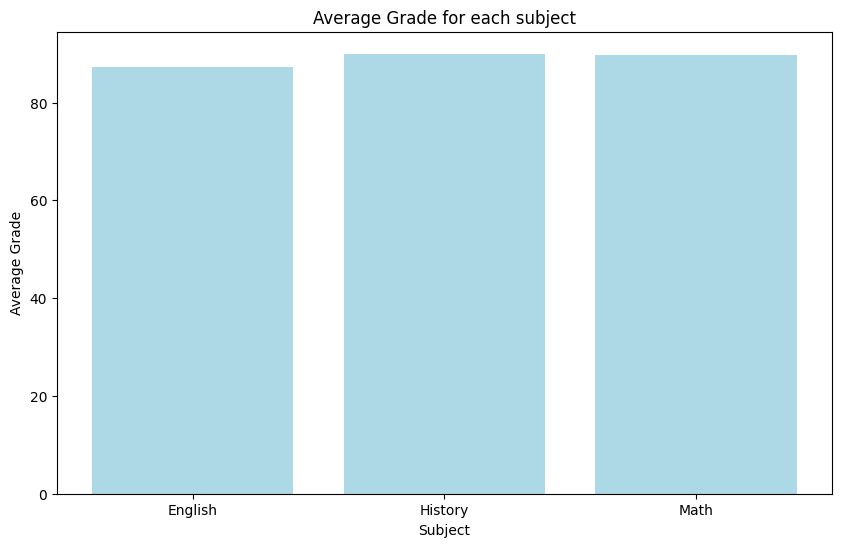

In [55]:
#set up the database
import sqlite3
connection = sqlite3.connect('student_grades.db')
cursor=connection.cursor()

#Create the necessary tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS student (
student_id INTEGER PRIMARY KEY AUTOINCREMENT,
first_name TEXT NOT NULL,
last_name TEXT NOT NULL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
  grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
  student_id INTEGER,
  subject TEXT NOT NULL,
  grade INTEGER,
  FOREIGN KEY (student_id) REFERENCES student(student_id)
)
''')

#Insert Data into the tables
student_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO student(first_name, last_name) VALUES(?,?)
''', student_data)
connection.commit()

print("Data inserted into the student table")

grades_data =[
    (1,'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 84),
    (2, 'English', 80),
    (2, 'History', 78),
    (3, 'Math', 90),
    (3, 'English', 92),
    (3, 'History', 94),
    (4, 'Math', 86),
    (4, 'English', 82),
    (4, 'History', 90),
    (5, 'Math', 94),
    (5, 'English', 94),
    (5, 'History', 98)
]

cursor.executemany('''
INSERT INTO grades(student_id, subject, grade) VALUES(?,?,?)
''', grades_data)
connection.commit()
print("Data inserted into the grades table")

# Retrieve all students' names and their grades
counter =0
cursor.execute('''
SELECT student.first_name, student.last_name, grades.subject, grades.grade
FROM student
JOIN grades ON student.student_id = grades.student_id
''')
joined_data = cursor.fetchall()
print("Students and their grades:")
for row in joined_data:
  print(row)
  counter +=1
  if counter == 15:
    break


#Find the average grade for each student
cursor.execute('''
SELECT student.first_name, student.last_name, AVG(grades.grade)  AS average_grade
FROM student
JOIN grades ON student.student_id = grades.student_id
GROUP BY student.student_id
''')
joined_data = cursor.fetchall()
print("Average grade per student:")
for row in joined_data:
  print(row)

#Find the student with the highest average grade
cursor.execute('''
SELECT student.first_name, student.last_name, AVG(grades.grade) AS average_grade
FROM student
JOIN grades ON student.student_id = grades.student_id
GROUP BY student.student_id
ORDER BY average_grade DESC''')
joined_data = cursor.fetchone()
print(f"Highest average grade: {joined_data[0]}")

#Find the average grade for the Math subject
cursor.execute('''
SELECT AVG(grade) AS average_mathgrade
FROM grades WHERE subject = 'Math'
''')
average_mathgrade = cursor.fetchone()
print(f"Average math grade: {average_mathgrade[0]}")


#List all students who scored above 90 in any subject
cursor.execute('''
SELECT student.first_name, student.last_name, grades.subject, grades.grade
FROM student
JOIN grades ON student.student_id = grades.student_id
WHERE grades.grade > 90
''')
joined_data = cursor.fetchall()
print("students with a grade above 90:")
for row in joined_data:
  print(row)

#Use Pandas to load the data from the students and grades tables into DataFrames
import pandas as pd
df_students = pd.read_sql_query ('SELECT * FROM student', connection)
print(df_students.head())

df_grades = pd.read_sql_query ('SELECT * FROM grades', connection)
print(df_grades.head(16))

#Use JOIN queries to combine the data from both tables into a single DataFrame
#that includes each student's name, subject, and grade
cursor.execute('''
SELECT student.first_name, student.last_name, grades.subject, grades.grade AS combined_dataframe
FROM student
JOIN grades ON student.student_id = grades.student_id
''')
df_combined = pd.DataFrame(cursor.fetchall(), columns=['first_name','last_name', 'subject', 'grade'])
print(df_combined.head(16))

#Visualize the data with Matplotlib
  #plot the average grades for each student
  #create a bar chart showing the average grade for each subject
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
connection = sqlite3.connect('student_grades.db')
query_combined = '''
SELECT student.first_name, student.last_name, grades.subject, grades.grade
FROM student
JOIN grades on student.student_id = grades.student_id
'''

df_combined = pd.read_sql_query(query_combined, connection)
connection.close()
df_studentavg = pd.DataFrame(cursor.fetchall(), columns = ['First Name', 'Last Name', 'Average Grade'] )

df_student_avg = df_combined.groupby(['first_name', 'last_name']) ['grade'].mean().reset_index()
df_student_avg.columns = ['First Name', 'Last Name', 'Average Grade']

df_subject_avg = df_combined.groupby('subject') ['grade'].mean().reset_index()
df_subject_avg.columns = ['Subject', 'Average Grade']

plt.figure(figsize=(10,6))
plt.bar(df_student_avg['First Name'] + ' ' + df_student_avg['Last Name'], df_student_avg['Average Grade'], color ='lightgreen')
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(df_subject_avg['Subject'], df_subject_avg['Average Grade'], color = "lightblue")
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for each subject')
plt.show()

connection.close()


